In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# iterating through directory 
for dir_name, _, file_names in os.walk('/kaggle/input'):
    for file in file_names: 
        print(os.path.join(dir_name, file)) # printing full path of each file
titanic_dataset= pd.read_csv('/kaggle/input/test-file/tested.csv') # read csv dataset
titanic_dataset.head() # first 5 entries of dataset

/kaggle/input/test-file/tested.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
print(titanic_dataset.columns) # columns in dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
embarked_column_data= titanic_dataset['Embarked'].unique()
for embarked in embarked_column_data:
    print("String ->",embarked)

String -> Q
String -> S
String -> C


In [5]:
# converting categorical data to numerical data, this will be used for model building
titanic_dataset['Embarked']= titanic_dataset['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
titanic_dataset['Sex']= titanic_dataset['Sex'].map({'female': 1,'male':0}).astype(int)

In [6]:
# drop name and ticket columns
titanic_dataset.drop(['Name','Ticket'], axis= 1, inplace= True) 

In [7]:
correlation= titanic_dataset.corr(numeric_only= True)
correlation['Survived'].sort_values(ascending= False)

Survived       1.000000
Sex            1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Embarked      -0.037432
Pclass        -0.108615
Name: Survived, dtype: float64

In [8]:
# new column family is calculated by adding sibling/spouses and parents/children data
titanic_dataset['Family']= titanic_dataset['SibSp'] + titanic_dataset['Parch']

In [9]:
# determining correlation with family column added
correlation= titanic_dataset.corr(numeric_only= True)
correlation['Survived'].sort_values(ascending= False)

Survived       1.000000
Sex            1.000000
Fare           0.191514
Family         0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Embarked      -0.037432
Pclass        -0.108615
Name: Survived, dtype: float64

Family column has a positive correlation of 0.161803 with Survived.

Since PassengerId does not have a meaningful impact on our prediction, we will drop it.
Similarly, SibSp and Parch columns do not have any use for us, so we will drop them too.

In [10]:
titanic_dataset.drop(['SibSp', 'Parch', 'PassengerId'], axis=1, inplace=True)

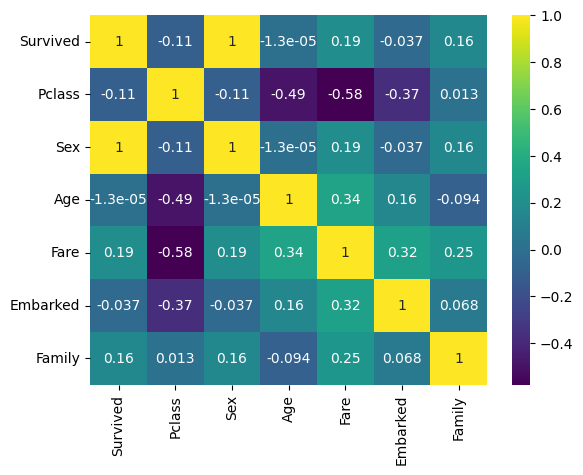

In [11]:
# correlation heatmap of numeric columns data
correlation= titanic_dataset.corr(numeric_only= True)
sns.heatmap(correlation, cmap= 'viridis', annot= True) # virdis colormap for data visualisation
plt.show()

In [12]:
# catering missing values in columns
missing_data= titanic_dataset.isnull().sum()
cleaned_dataset= pd.DataFrame({'Missing Data Points': missing_data.values}, index= titanic_dataset.columns)
cleaned_dataset

,Missing Data Points
Survived,0
Pclass,0
Sex,0
Age,86
Fare,1
Cabin,327
Embarked,0
Family,0


In [13]:
# drop cabin column because it has too many null values
titanic_dataset.drop(['Cabin'], axis= 1, inplace= True)

Now, we will fill missing values of age column with mean value.

In [14]:
# filling missing data of age column with mean value
age_column_mean= titanic_dataset['Age'].mean()
titanic_dataset['Age'].fillna(age_column_mean, inplace= True)

Now, we will plot a histogram to visualise the age column after filling it.


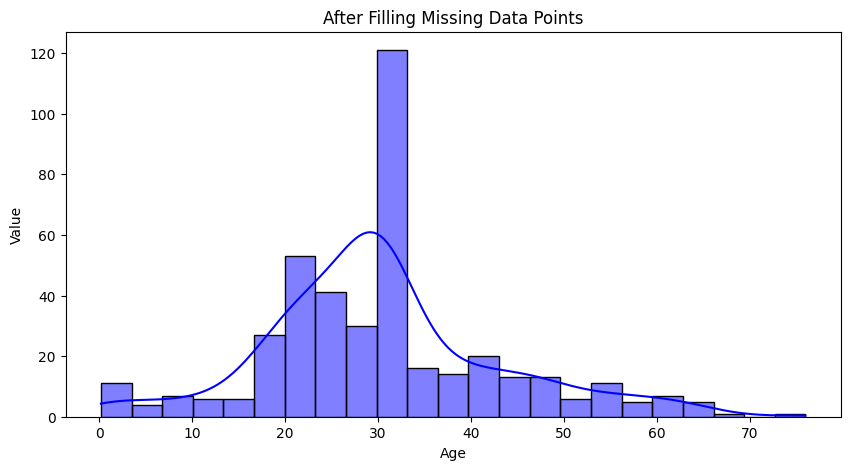

In [15]:
# plotting histogram 
plt.figure(figsize= (10, 5))
sns.histplot(titanic_dataset['Age'], kde= True, color= 'blue')
plt.title('After Filling Missing Data Points')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

Fare column has 1 missing value, we will calculate the median and fill it with the value.

In [16]:
# filling missing data of age column with mean value
fare_median= titanic_dataset['Fare'].median()
titanic_dataset['Fare'].fillna(fare_median, inplace= True)

In [17]:
# catering missing values in columns
missing_data= titanic_dataset.isnull().sum()
cleaned_dataset= pd.DataFrame({'Missing Data Points': missing_data.values}, index= titanic_dataset.columns)
cleaned_dataset

,Missing Data Points
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Family,0


Now that the dataset is cleaned, we can move on.
From the following plot, we can see the relation between Age and Survival. For each age group, the graph visualises the survivals. The highest number of survivors are from age group 40 to 60, while the lowest age group is 70.

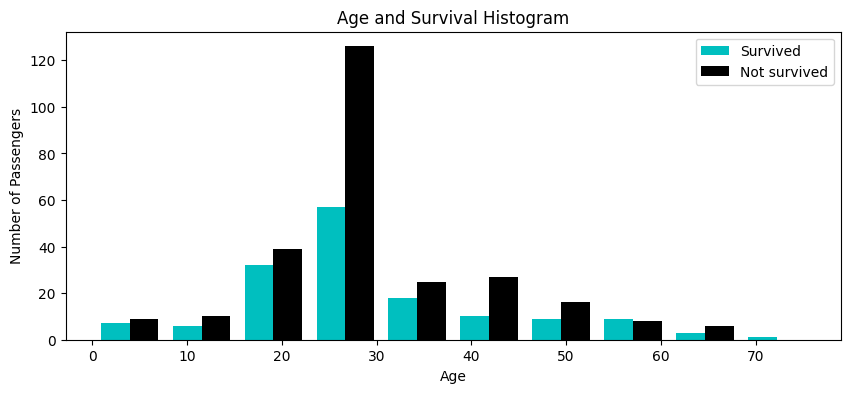

In [18]:
figure= plt.figure(figsize =(10, 4))
plt.hist(x= [titanic_dataset[titanic_dataset['Survived'] ==1 ]['Age'], titanic_dataset[titanic_dataset['Survived'] == 0]['Age']], stacked= False, color= ['c','k'],label = ['Survived', 'Not survived'])
plt.title('Age and Survival Histogram')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

With the help of a bar chart, we will see the number of people who survived and those who didn't survive.

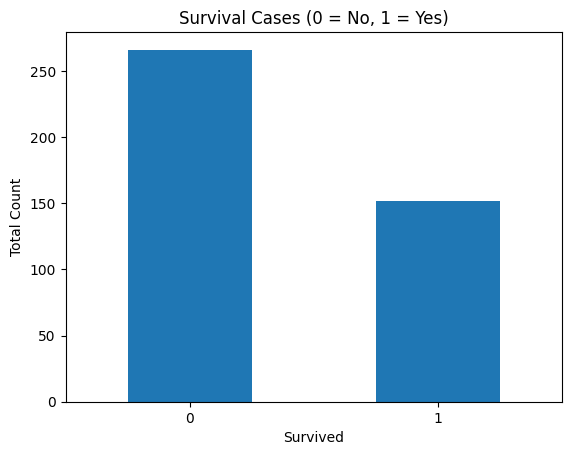

In [19]:
# plotting a bar chart
survival_cases= titanic_dataset['Survived'].value_counts()
survival_cases.plot(kind= 'bar', rot=0)
# adding labels and title
plt.xlabel('Survived')
plt.ylabel('Total Count')
plt.title('Survival Cases (0 = No, 1 = Yes)')
plt.show()

With the help of a bar plot, we will judge the relation of pclass and survival.

<Axes: xlabel='Pclass', ylabel='Survived'>

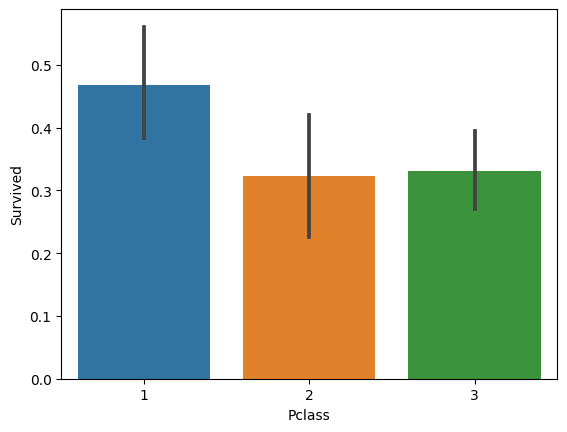

In [20]:
# pclass plot
sns.barplot(x= 'Pclass', y= 'Survived', data=titanic_dataset)

Pclass is correlated with the chances of a passenger's survival, especially if it's class 1.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


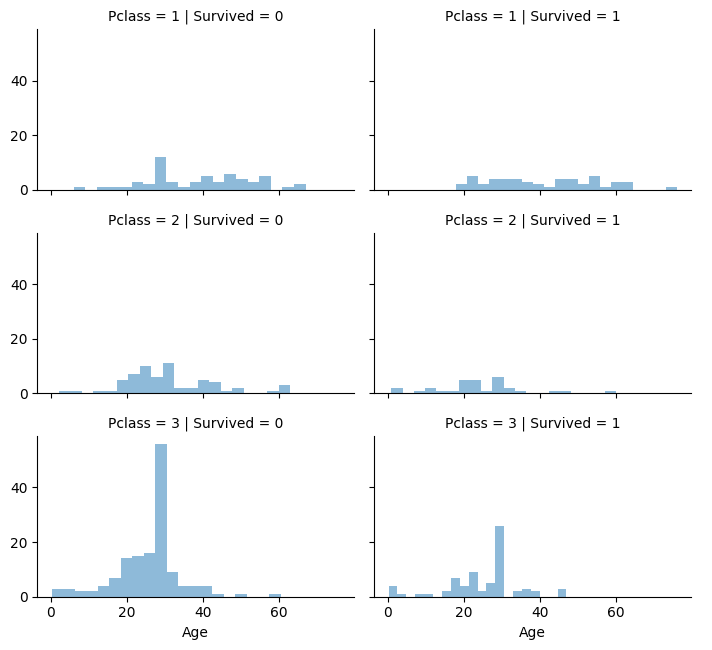

In [21]:
grid = sns.FacetGrid(titanic_dataset, col= 'Survived', row= 'Pclass', height= 2.2, aspect= 1.6)
grid.map(plt.hist, 'Age', alpha= 0.5, bins= 20)
grid.add_legend()
plt.show()

This plot is evidence of the relation between survival probability and a passenger's class. Moreover, survival rate in class 3 is next to none.

We can now have a final look at our dataset before moving on to **model building**.

In [22]:
titanic_dataset.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,34.5,7.8292,0,0
1,1,3,1,47.0,7.0000,1,1
2,0,2,0,62.0,9.6875,0,0
3,0,3,0,27.0,8.6625,1,0
4,1,3,1,22.0,12.2875,1,2
5,0,3,0,14.0,9.2250,1,0
6,1,3,1,30.0,7.6292,0,0
7,0,2,0,26.0,29.0000,1,2
8,1,3,1,18.0,7.2292,2,0
9,0,3,0,21.0,24.1500,1,2


**Splitting the dataset into training and testing sets.**

In [23]:
# drop survived column for training data
training_data= titanic_dataset.drop(['Survived'], axis=1)
# keep only the survived column for testing data 
testing_data= titanic_dataset.iloc[:,1]
# splitting the data, 20% for testing
x_train, x_test, y_train, y_test= train_test_split(training_data, testing_data, test_size= 0.2, random_state= 1)

**Logistic Regression**

In [24]:
lr= LogisticRegression(solver= 'liblinear', max_iter= 200)
lr.fit(x_train, y_train) # fit the model on training data
predictor= lr.predict(x_test) # prediction on test data
lr_accuracy= accuracy_score(predictor, y_test) # calculating accuracy score
print('{:.2f}%'.format(lr_accuracy * 100))

95.24%


**Random Forest Model**

In [25]:
random_forest= RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train) # fit the model on training data
predictor= random_forest.predict(x_test) # prediction on test data
random_forest.score(x_train, y_train) 
random_forest_accuracy= round(random_forest.score(x_train, y_train))
print('{:.2f}%'.format(random_forest_accuracy * 100))

100.00%
